# Assignment-3
Due date Oct. 10

In this assignment, you are asked to calculate sharpe ratio first with your own code and then employing `PyPortfolioOpt` library using Apple, Amazon, 3M, and Exxon companies. Please see [this website](https://pyportfolioopt.readthedocs.io/en/latest/) for more information about `PyPortfolioOpt`. The daily data covers the period of 2021-01-01 and 2022-01-01. To accomplish this task:

* Annualized the daily return and standard deviation for each respective stock.
* Draw efficient frontier.
* Assume risk free rate to be 0.01.
* Calculate the sharpe ratio and interpret which one is the best.

Hint: Please use `plot_efficient_frontier` function in `PyPortfolioOpt` to draw efficient frontier.

Again, please keep in mind that you are going to accomplish the task first with your own code and using `PyPortfolioOpt` library. Also note that you do not need to get exactly the same result.

In [1]:
#codes and explanations here.

In [2]:
pip install PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np


In [4]:
stocks = ['AAPL', 'AMZN', 'MMM', 'XOM' ]
start = datetime.datetime(2021,1, 1)
end = datetime.datetime(2022, 1, 1)
stock_data = yf.download(stocks, start=start, end=end, interval='1d')['Close']

[*********************100%***********************]  4 of 4 completed


In [5]:
stock_data.head()

,AAPL,AMZN,MMM,XOM
Date,,,,
2021-01-04,129.410004,159.331497,171.869995,41.500000
2021-01-05,131.009995,160.925507,171.580002,43.500000
2021-01-06,126.599998,156.919006,174.190002,44.610001
2021-01-07,130.919998,158.108002,169.720001,44.959999
2021-01-08,132.050003,159.134995,166.619995,45.459999


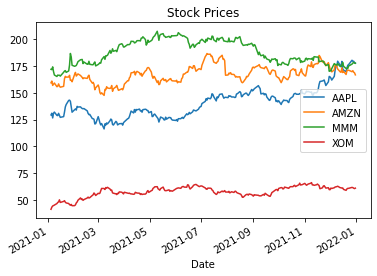

In [6]:
stock_data.plot()
plt.title('Stock Prices')
plt.xlabel('Date')
plt.show()

### Annualize the daily return and standard deviation for each respective stock.¶

In [7]:
returns = stock_data.pct_change()
returns.dropna(inplace=True)
returns.head()

,AAPL,AMZN,MMM,XOM
Date,,,,
2021-01-05,0.012364,0.010004,-0.001687,0.048193
2021-01-06,-0.033662,-0.024897,0.015212,0.025517
2021-01-07,0.034123,0.007577,-0.025662,0.007846
2021-01-08,0.008631,0.006496,-0.018265,0.011121
2021-01-11,-0.023249,-0.021519,-0.008522,0.030356


In [8]:
returns_annualize = returns * (252)
returns_annualize.head()

,AAPL,AMZN,MMM,XOM
Date,,,,
2021-01-05,3.115661,2.521098,-0.425195,12.144578
2021-01-06,-8.482704,-6.273947,3.833315,6.430348
2021-01-07,8.599052,1.909436,-6.466733,1.977127
2021-01-08,2.175078,1.636870,-4.602884,2.802491
2021-01-11,-5.858704,-5.422904,-2.147639,7.649808


In [9]:
standard_deviation = returns.std()
standard_deviation.head()

AAPL    0.015761
AMZN    0.015145
MMM     0.011794
XOM     0.018796
dtype: float64

In [10]:
standard_deviation_annualize = standard_deviation * np.sqrt(252)
standard_deviation_annualize.head()

AAPL    0.250198
AMZN    0.240413
MMM     0.187225
XOM     0.298374
dtype: float64

### Calculate the sharpe ratio and interpret which one is the best.

In [11]:
rf=0.01  # given risk free rate
def sharpe(stocks, rf, n_assets):
    sharpe_ratios = {}
    for i, j in zip(stocks, range(n_assets)):
        sharpe_ratios[i] = returns.iloc[:, j].mean() - rf / np.std(returns.iloc[:, j])
    return sharpe_ratios

In [12]:
returns.columns[:4]

Index(['AAPL', 'AMZN', 'MMM', 'XOM'], dtype='object')

In [13]:
stocks = returns.columns[:4]
sharpe_ratios = sharpe(stocks, rf, 4)
sharpe_ratios

{'AAPL': -0.6343611972999732,
 'AMZN': -0.6613260733573703,
 'MMM': -0.8493779370931674,
 'XOM': -0.5313736382852983}

from the individual sharpe ratios of all the 4 companies it is observed that XOM has higher sharpe ratio of -0.533. The higher Sharpe ratio indicates good investment performance.Therefore XOM is the best company for investment.

In [14]:
print(max(sharpe_ratios, key=sharpe_ratios.get))
print(max(sharpe_ratios.values()))

XOM
-0.5313736382852983


In [15]:
import numpy as np
returns = np.log(stock_data/stock_data.shift(1))

In [16]:
returns.dropna(inplace=True)

In [17]:
returns.describe()

,AAPL,AMZN,MMM,XOM
count,251.000000,251.000000,251.000000,251.000000
mean,0.001260,0.000181,0.000131,0.001547
std,0.015753,0.015184,0.011798,0.018763
min,-0.042567,-0.078663,-0.046380,-0.049297
25%,-0.007546,-0.008578,-0.005752,-0.011207
50%,0.001473,0.001083,0.000327,0.001782
75%,0.012378,0.009847,0.007293,0.013288
max,0.052451,0.045859,0.059035,0.047068


In [18]:
def get_opt(weights):
    weights = np.array(weights)
    ret = np.sum(returns.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * np.sqrt(252), weights)))
    sharpe = ret / vol
    return np.array([ret, vol, sharpe])

In [19]:
from scipy.optimize import minimize

In [20]:
def neg_sharpe(weights):
    return get_opt(weights)[2] * -1

In [21]:
def const_sum(weights):
    return np.sum(weights)-1

In [22]:
cons = ({'type':'eq', 'fun':const_sum})

In [23]:
bounds = ((0, 1), (0, 1), (0, 1),(0,1))

In [24]:
init_guess = [0.20, 0.30, 0.10,0.30]

In [25]:
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints= cons)

In [26]:
opt_results

     fun: -7.056017646395317
     jac: array([-3.49283218e-05,  2.92894858e+00,  1.18946487e+00,  4.02331352e-05])
 message: 'Optimization terminated successfully'
    nfev: 35
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([5.35183569e-01, 0.00000000e+00, 4.71356894e-16, 4.64816431e-01])

In [27]:
opt_results.x

array([5.35183569e-01, 0.00000000e+00, 4.71356894e-16, 4.64816431e-01])

In [28]:
get_opt(opt_results.x)

array([0.35119835, 0.04977288, 7.05601765])

From the optimum results it is observed that the optimum value of sharpe value is 7.056

### accomplish the task using PyPortfolioOpt library.

In [29]:
from pypfopt.efficient_frontier import EfficientFrontier

In [30]:
import pandas as pd
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns


# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(stock_data)
S = risk_models.sample_cov(stock_data)

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)


In [31]:
weights = ef.max_sharpe()
ef.portfolio_performance(verbose=True)

Expected annual return: 42.3%
Annual volatility: 19.9%
Sharpe Ratio: 2.03


(0.4230681299501857, 0.19891419149498954, 2.026341745256213)

After caluculating the sharpe ratio value for the considered stocks it is observed that the maximum optimized sharpe ratio is 2.026 and expected annual return is 42.3%.

### Draw efficient frontier

In [32]:
from pypfopt import plotting



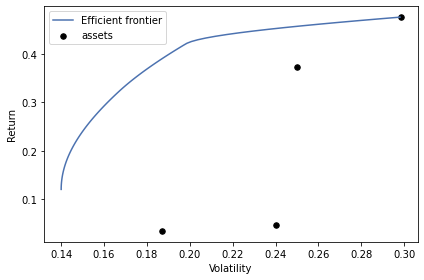

In [33]:
ef = EfficientFrontier(mu, S, weight_bounds=(0,1))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()

from the above effiecnt frontier plot it is observed that XOM company had best returns compared to other companies considering volatily.

### ref:
https://pyportfolioopt.readthedocs.io/en/latest/Plotting.html#:~:text=To%20produce%20a%20plot%20of%20the%20efficient%20frontier%2C,pass%20this%20the%20instantiated%20object%20into%20plot.plot_efficient_frontier%20%28%29%3A


